In [21]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation
import matplotlib.pyplot as plt
import cv2
import imghdr
import os

In [ ]:
images = '/Users/bensmolko/Desktop/waste_project/DATASET'
o = images+'/TRAIN/o'


In [ ]:
os.listdir(os.path.join(o))
os.listdir(os.path.join('/Users/bensmolko/Desktop/waste_project/DATASET/TEST'))

In [17]:
image = cv2.imread(os.path.join(o, 'O_10470.jpg'))

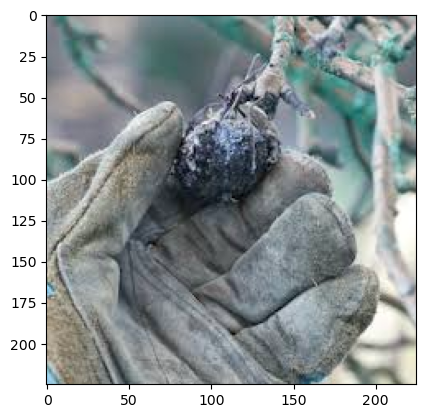

In [18]:
plt.imshow(image)

dataset = tf.keras.utils.image_dataset_from_directory('images')

In [22]:
train_dataset = tf.keras.utils.image_dataset_from_directory('/Users/bensmolko/Desktop/waste_project/DATASET/TRAIN', batch_size=256)
test_dataset = tf.keras.utils.image_dataset_from_directory('/Users/bensmolko/Desktop/waste_project/DATASET/TEST', batch_size=256)

Found 22564 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.


In [5]:
train_iterator = train_dataset.as_numpy_iterator()
test_iterator = test_dataset.as_numpy_iterator()

In [6]:
batch = train_iterator.next()

In [22]:
len(batch)

2

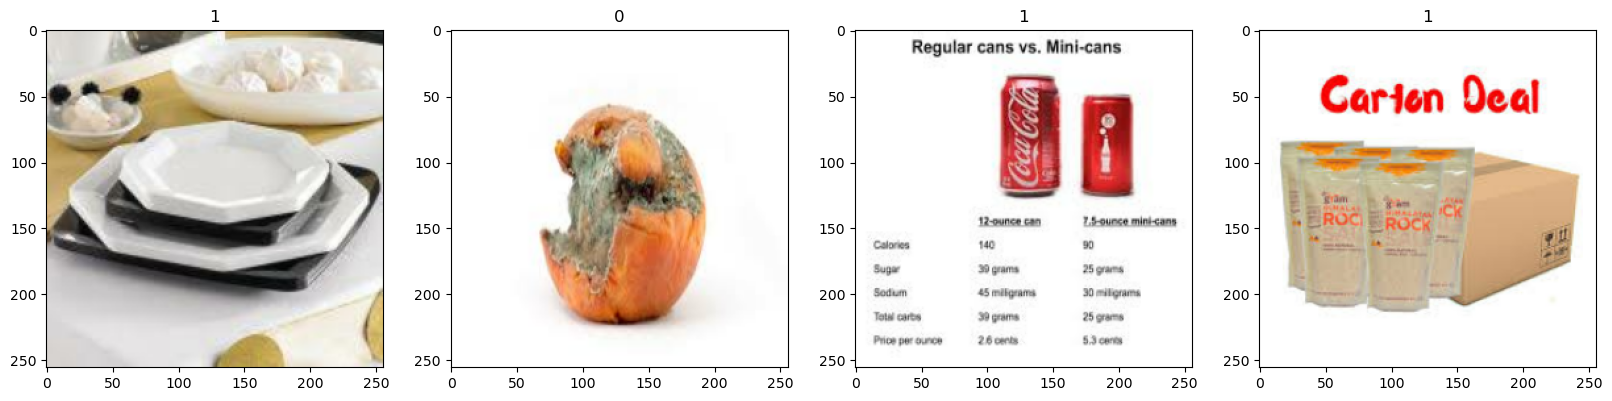

In [7]:
#Organic: 0
#Recyclable: 1

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [23]:
train_data=train_dataset.map(lambda x, y: (x/255, y))
test_data=test_dataset.map(lambda x, y: (x/255, y))

In [33]:
model = Sequential([
    Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(),
    Conv2D(64, (3,3), 1, activation='relu'),
    MaxPooling2D(),
    Conv2D(128, (3, 3), 1, activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid'),
])


model.compile(
    optimizer='adam',
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [40]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 128)      

In [34]:
model.fit(train_data, epochs=15)

Epoch 1/15
89/89 [==============================] - 589s 7s/step - loss: 0.7193 - accuracy: 0.7725
Epoch 2/15
89/89 [==============================] - 590s 7s/step - loss: 0.4008 - accuracy: 0.8301
Epoch 3/15
89/89 [==============================] - 574s 6s/step - loss: 0.3673 - accuracy: 0.8456
Epoch 4/15
89/89 [==============================] - 562s 6s/step - loss: 0.3420 - accuracy: 0.8571
Epoch 5/15
89/89 [==============================] - 544s 6s/step - loss: 0.3038 - accuracy: 0.8747
Epoch 6/15
89/89 [==============================] - 544s 6s/step - loss: 0.2716 - accuracy: 0.8898
Epoch 7/15
89/89 [==============================] - 529s 6s/step - loss: 0.2567 - accuracy: 0.8995
Epoch 8/15
89/89 [==============================] - 549s 6s/step - loss: 0.2162 - accuracy: 0.9129
Epoch 9/15
89/89 [==============================] - 555s 6s/step - loss: 0.1946 - accuracy: 0.9244
Epoch 10/15
89/89 [==============================] - 549s 6s/step - loss: 0.1646 - accuracy: 0.9350
Epoch 11/

In [65]:
preds = model.predict(test_dataset)

79/79 [==============================] - 1s 8ms/step


In [66]:
predlist = preds.tolist()

In [67]:
predlist[0]

[0.9558819532394409]

In [35]:
from tensorflow.keras.metrics import Precision, Recall, Accuracy


pre = Precision()
re = Recall()
acc = Accuracy()



for batch in test_dataset:
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

7/7 [==============================] - 1s 137ms/step


In [36]:
print(f'result: {pre.result().numpy()}, recall: {re.result().numpy()}, accuracy: {acc.result().numpy()}')

result: 0.8528826832771301, recall: 0.7715827226638794, accuracy: 0.8261042833328247


In [19]:
img = cv2.imread('/Users/bensmolko/Desktop/waste_project/test_leaf.jpeg')

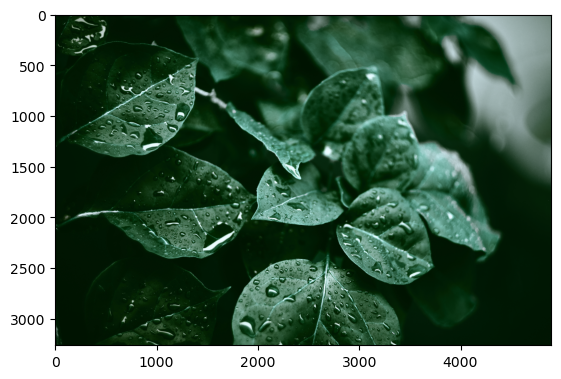

In [20]:
plt.imshow(img)
plt.show()

In [21]:
resize = tf.image.resize(img, (256, 256))

In [22]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 68ms/step


In [23]:
yhat

array([[0.9759949]], dtype=float32)

In [60]:
img = cv2.imread('/Users/bensmolko/Desktop/waste_project/DATASET/TRAIN/O/O_11103.jpg')

In [61]:
resize = tf.image.resize(img, (256, 256))

In [62]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 25ms/step


In [63]:
yhat

array([[0.9999994]], dtype=float32)

In [38]:
model.save("waste_predict_final.h5")